In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


![](https://i.pinimg.com/originals/9b/2a/e6/9b2ae61f72dc6d0646764daddcdb2375.jpg/)

 <h1 style="background-color:#ccccff
;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 15px;"> Titanic</h1><a id=0></a>

 ### Our work flow is :

 #  [1. Titanic dataset EDA and Analysis before modeling](#1)
 
   [1.1 Importing the data:](#1.1)
   
   [1.2 Merging the data:](#1.2)
   
   [1.3 Exploratory Data Analysis:](#1.3)
   
   [1.4  statistical summary:](#1.4)
   
   [1.5  data preparation and cleaning :](#1.5)

  <h1 style="background-color:#ccccff
;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 15px;"> import libraries</h1><a id=0></a>

In [2]:
pip install sklearn_features

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd
import missingno as msno

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px




from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn_features.transformers import DataFrameSelector

from sklearn.model_selection import train_test_split , StratifiedKFold

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier


from sklearn.model_selection import cross_val_score ,StratifiedKFold , cross_validate  , cross_val_predict
from sklearn.metrics import confusion_matrix ,classification_report ,f1_score

from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV


from sklearn.ensemble import VotingClassifier

import joblib

import warnings
warnings.filterwarnings('ignore')

 <h1 style="background-color:#ccccff
;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 15px;">    Import datasets
 </h1> <a id=1.1></a> 

In [4]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv") 
df_test = pd.read_csv("/kaggle/input/titanic/test.csv") 

| **Variable** |               **Definition**               |                     **Key**                    |
|:------------:|:------------------------------------------:|:----------------------------------------------:|
|   survival   |                  Survival                  |                 0 = No, 1 = Yes                |
|    pclass    |                Ticket class                |            1 = 1st, 2 = 2nd, 3 = 3rd           |
|      sex     |                     Sex                    |                                                |
|      Age     |                Age in years                |                                                |
|     sibsp    | # of siblings / spouses aboard the Titanic |                                                |
|     parch    | # of parents / children aboard the Titanic |                                                |
|    ticket    |                Ticket number               |                                                |
|     fare     |               Passenger fare               |                                                |
|     cabin    |                Cabin number                |                                                |
|   embarked   |             Port of Embarkation            | C = Cherbourg, Q = Queenstown, S = Southampton |

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


 <h1 style="background-color:#ccccff
;font-family:newtimeroman;font-size:250%;text-align:left;border-radius: 15px 15px;">                    Explotary data analysis
 </h1> <a id=1.1></a> 

#### - First at all we will merge the df_trian and df_test to make EDA faster 

#### - Data quality assessment

In [7]:
df =  pd.concat(objs=[df_train, df_test], axis=0).reset_index(drop=True)

In [8]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [11]:
df.shape

(1309, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [15]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [16]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [17]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Desplay missing values

<AxesSubplot:>

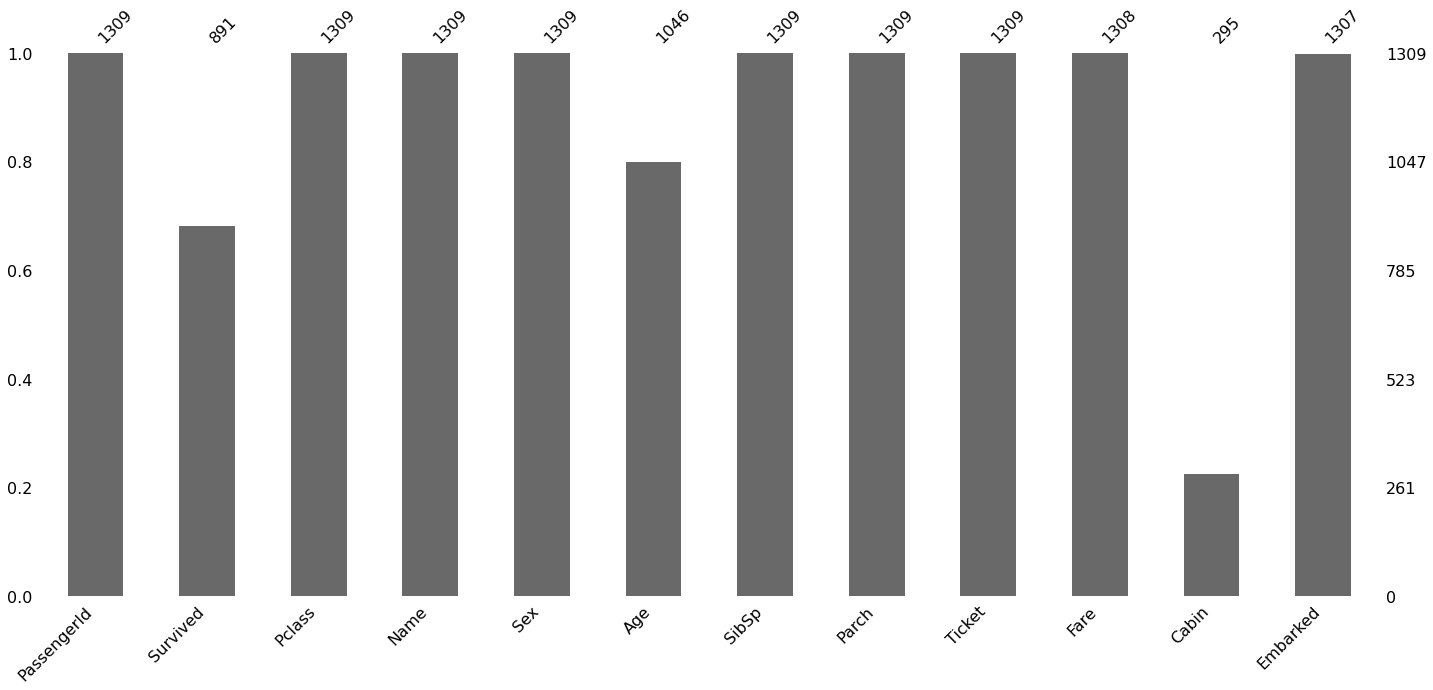

In [18]:
msno.bar(df)

<AxesSubplot:>

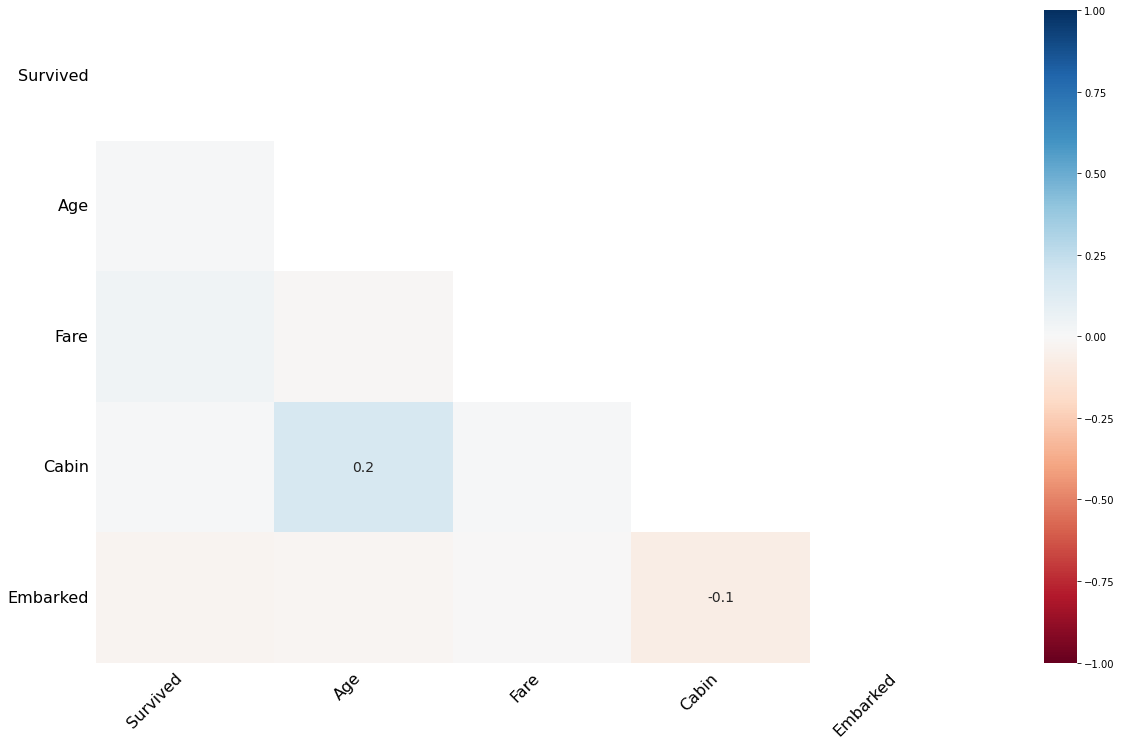

In [19]:
msno.heatmap(df)

### Data visualization 

##### check the relation between feature 

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

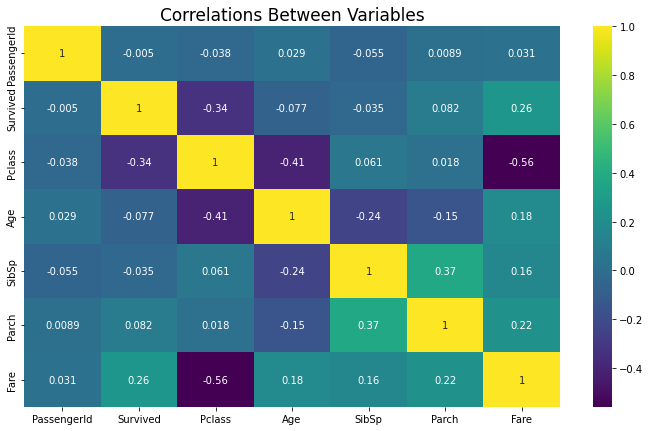

In [21]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title("Correlations Between Variables", size=17)
plt.show()

## Data visualization 

#### we'll make comparison between all columns and survival column 

### check colleration between sex and survived or not 

In [22]:
sex=df["Sex"].value_counts().reset_index()
sex.columns=["sex","count"]

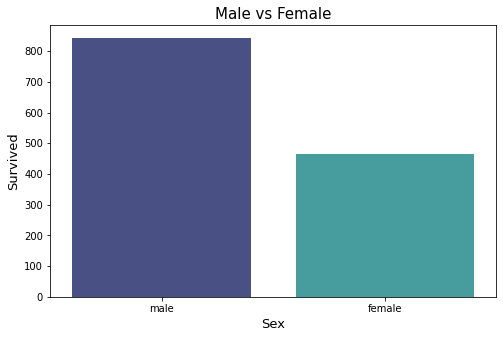

In [23]:
#draw a bar plot  to count of survival by sex
plt.figure(figsize=(8,5))
sns.barplot(x="sex", y="count" ,data=sex,palette="mako")
plt.title("Male vs Female",size=15)
plt.xlabel("Sex",size=13)
plt.ylabel("Survived",size=13)
plt.show()


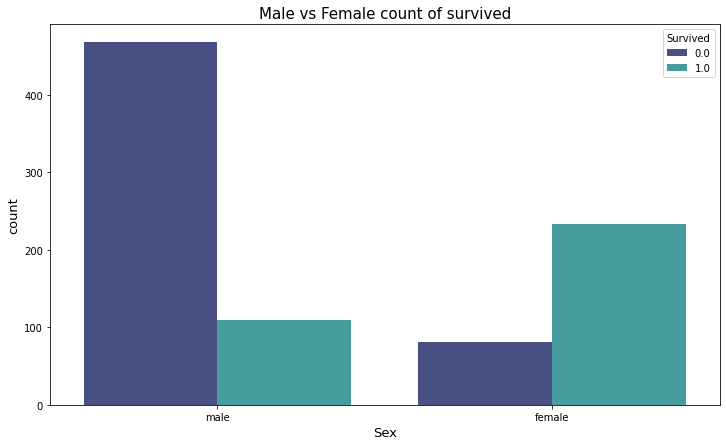

In [24]:
plt.figure(figsize=(12,7))
sns.countplot(x="Sex",hue ="Survived" ,data=df,palette="mako")
plt.title("Male vs Female count of survived",size=15)
plt.xlabel("Sex",size=13)
plt.ylabel("count",size=13)
plt.show()

In [25]:
#print percentages of females vs. males that survive
print("Percentage of females who survived:", df["Survived"][df["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:",df["Survived"][df["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


In [26]:
df[(df["Sex"]=="male")&(df["Survived"]== 0)]["Survived"].count()

468

In [27]:
df[(df["Sex"]=="male")&(df["Survived"]== 1)]["Survived"].count()

109

## The number fo passengers

In [28]:
pie=df["Sex"].value_counts().reset_index()
pie.columns=["sex","count"]
pie

,sex,count
0,male,843
1,female,466


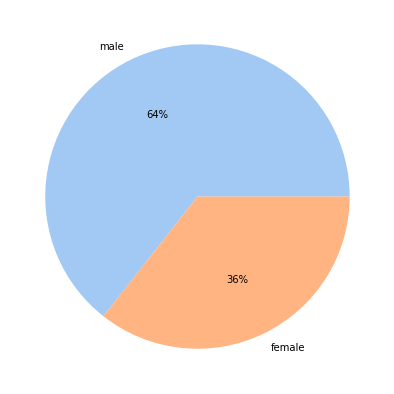

In [29]:
plt.figure(figsize=(12,7))
color=sns.color_palette("pastel")
plt.pie(pie["count"],colors=color,autopct='%.0f%%',labels=pie["sex"])
plt.show()

In [30]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


## Summaries :
#### as we can see that the most survived are Females with 74.2% of passengers and 18.8 of Males only
#### and the most of passengers were Males so the numbes of deith from males 

# Check colleration between passenger class and survived  : 

In [31]:
class_count=df["Pclass"].value_counts().reset_index()
class_count.columns=["Class","count"]
class_count.sort_values(by='count',ascending=False)
class_count.sort_values(['count']).reset_index(drop=True)

,Class,count
0,2,277
1,1,323
2,3,709


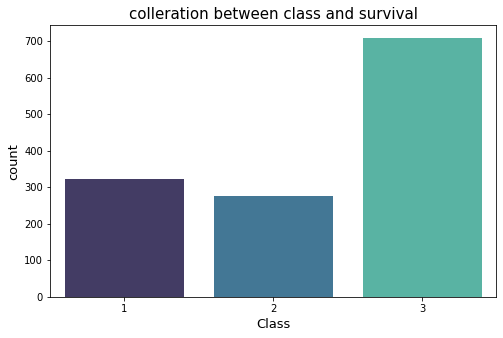

In [32]:
#draw a bar plot to count the number in eaxh class 
plt.figure(figsize=(8,5))
sns.barplot(x='Class', y="count", data=class_count,palette="mako")
plt.title("colleration between class and survival",size=15)
plt.xlabel("Class",size=13)
plt.ylabel("count",size=13)
plt.show()

In [33]:
pasengers_class=df["Pclass"].value_counts().reset_index()
pasengers_class.columns=["class","count"]
pasengers_class.T

,0,1,2
class,3,1,2
count,709,323,277


In [34]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


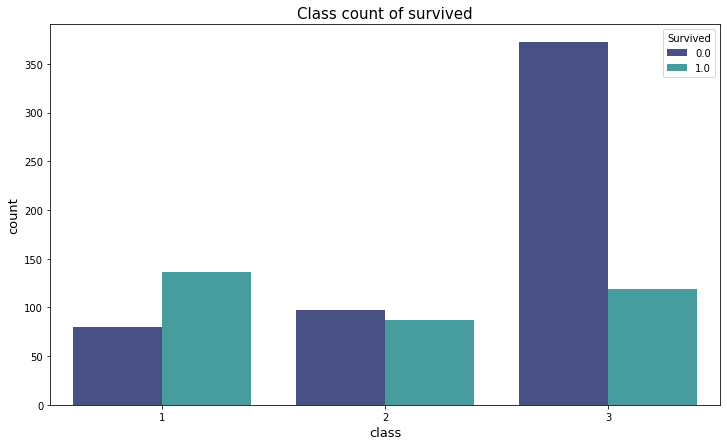

In [35]:
plt.figure(figsize=(12,7))
sns.countplot(x="Pclass",hue ="Survived" ,data=df,palette="mako")
plt.title("Class count of survived",size=15)
plt.xlabel("class",size=13)
plt.ylabel("count",size=13)
plt.show()

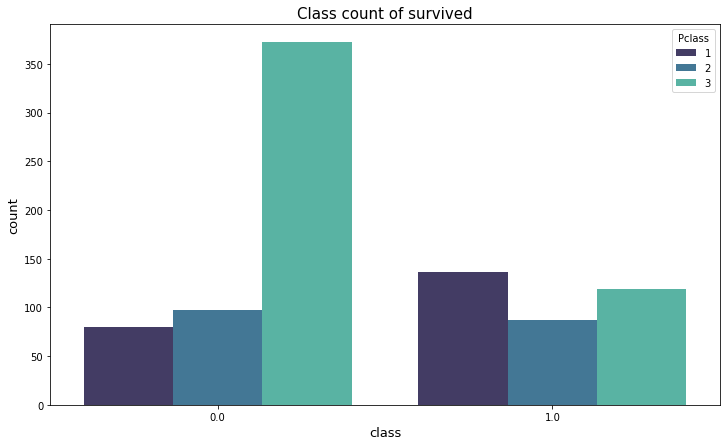

In [36]:
plt.figure(figsize=(12,7))
sns.countplot(x="Survived",hue ="Pclass" ,data=df,palette="mako")
plt.title("Class count of survived",size=15)
plt.xlabel("class",size=13)
plt.ylabel("count",size=13)
plt.show()

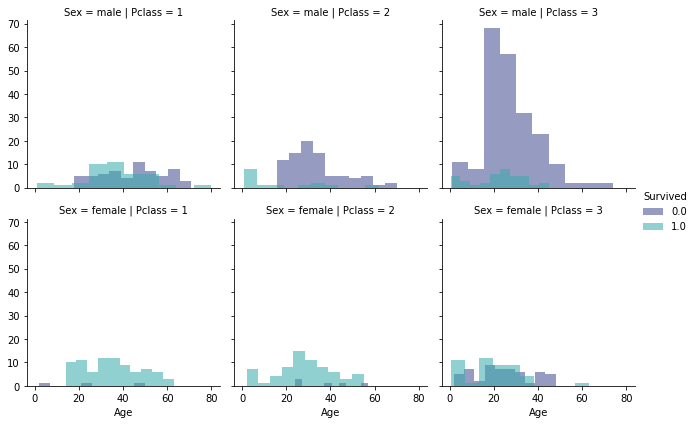

In [37]:
#histogram comparison of sex, class, and age by survival
plot = sns.FacetGrid(df, row = 'Sex', col = 'Pclass', hue = 'Survived',palette="mako")
plot.map(plt.hist, 'Age', alpha = .55)
plot.add_legend()

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

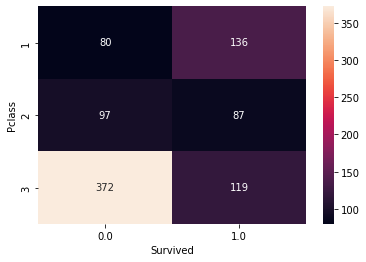

In [38]:

# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 

sns.heatmap(pclass_survived, annot = True, fmt ="d")

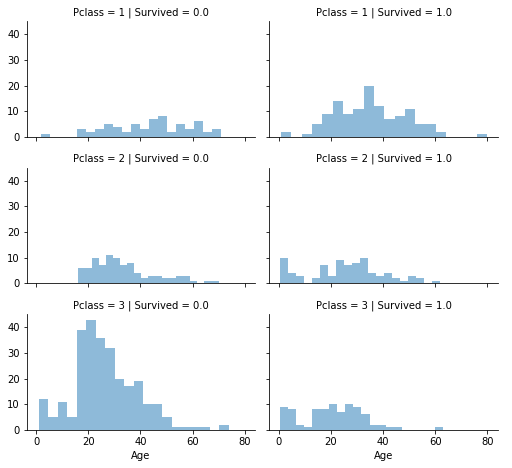

In [39]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Summaries :
### - So as we can see here that class 1 is most survived  and  2 then 3 
### - Most of passnegers where in class 3 and class  1 then class 2 


# Check colleration between siblings and survived  :

In [40]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False).T

,1,2,0,3,4,5,6
SibSp,1.000000,2.000000,0.000000,3.00,4.000000,5.0,8.0
Survived,0.535885,0.464286,0.345395,0.25,0.166667,0.0,0.0


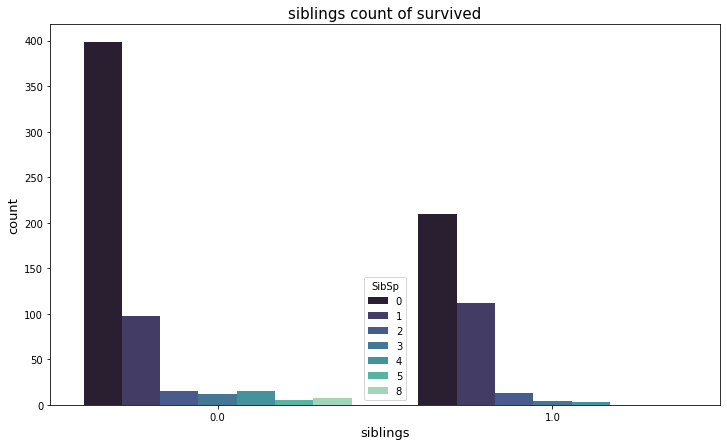

In [41]:
plt.figure(figsize=(12,7))
sns.countplot(x="Survived",hue ="SibSp" ,data=df,palette="mako")
plt.title("siblings count of survived",size=15)
plt.xlabel("siblings",size=13)
plt.ylabel("count",size=13)
plt.show()


# Summaries :
#### where number of siblings increase the number of death too

# Check colleration between parch and survived  :

In [42]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False).T

,3,1,2,0,5,4,6,7
Parch,3.0,1.000000,2.0,0.000000,5.0,4.0,6.0,9.0
Survived,0.6,0.550847,0.5,0.343658,0.2,0.0,0.0,NaN


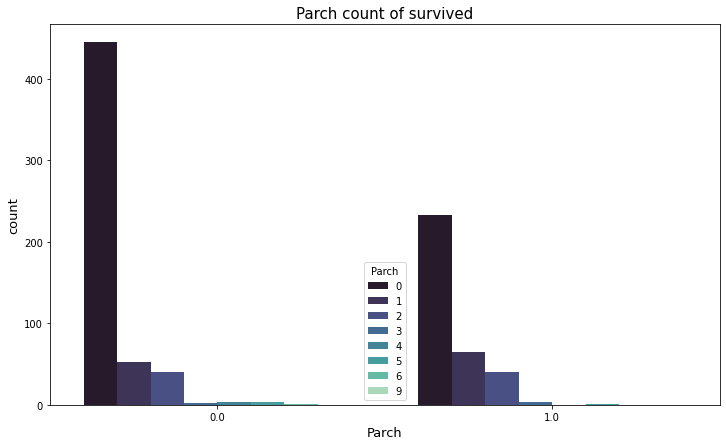

In [43]:
plt.figure(figsize=(12,7))
sns.countplot(x="Survived",hue ="Parch" ,data=df,palette="mako")
plt.title("Parch count of survived",size=15)
plt.xlabel("Parch",size=13)
plt.ylabel("count",size=13)
plt.show()

In [44]:
parch=df["Parch"].value_counts().reset_index()
parch.columns=["Parch","count"]
parch

,Parch,count
0,0,1002
1,1,170
2,2,113
3,3,8
4,5,6
5,4,6
6,6,2
7,9,2


#### - As number of parch increase the number of death too

# Age vs survived  : 

#### - check the range of ages 

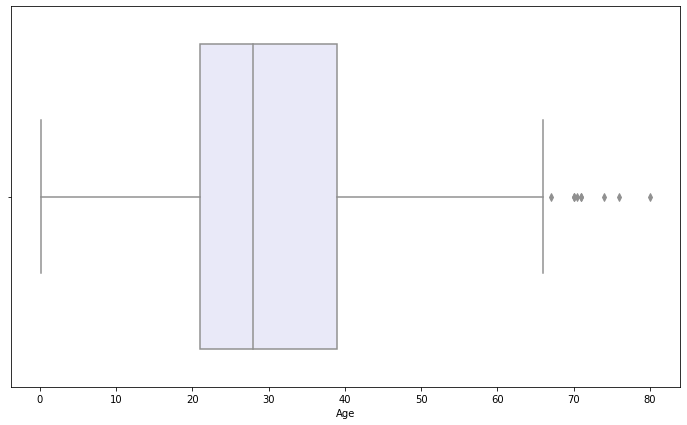

In [45]:
plt.figure(figsize=(12,7))
sns.boxplot(df['Age'],color="#E6E6FA")
plt.show()

In [46]:
class_count=df["Pclass"].value_counts().reset_index()
class_count.columns=["Class","count"]

# check the distribution of age 

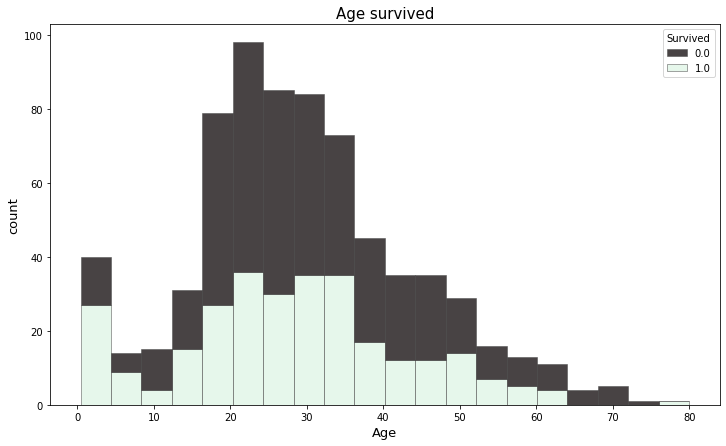

In [47]:
plt.figure(figsize=(12,7))
sns.histplot(x="Age",hue ="Survived" ,data=df, multiple="stack",
    palette="mako",
    edgecolor=".3",
    linewidth=.5,
    )
plt.title("Age survived",size=15)
plt.xlabel("Age",size=13)
plt.ylabel("count",size=13)
plt.show()


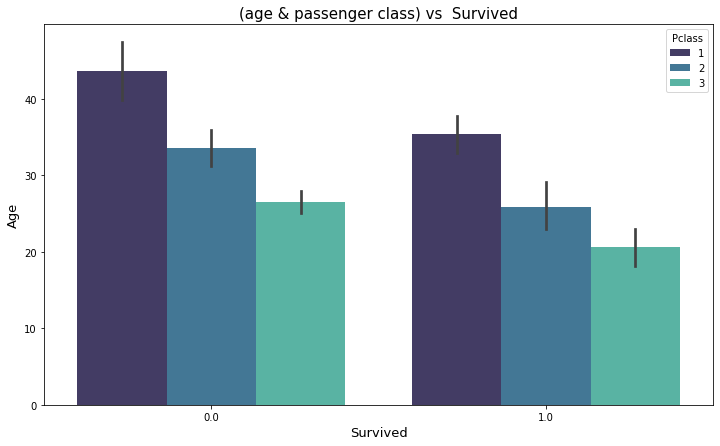

In [48]:
plt.figure(figsize=(12,7))
sns.barplot(x="Survived",y="Age",data=df,hue="Pclass",palette="mako")
plt.title("(age & passenger class) vs  Survived",size=15)
plt.xlabel("Survived",size=13)
plt.ylabel("Age" , size=13)

plt.show()

In [49]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False) 

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [50]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### 

<Figure size 864x504 with 0 Axes>

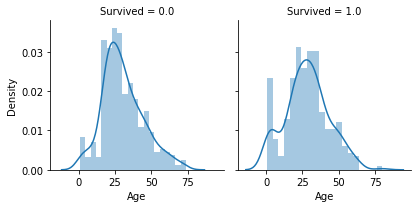

In [51]:
plt.figure(figsize=(12,7))
plot = sns.FacetGrid(df, col='Survived')
plot = plot.map(sns.distplot, "Age" , bins=20)
plt.show()

<Figure size 864x504 with 0 Axes>

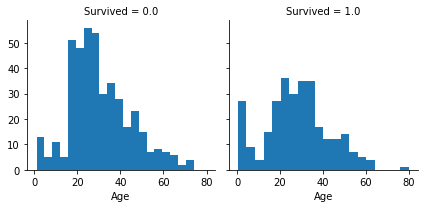

In [52]:
plt.figure(figsize=(12,7))
plot = sns.FacetGrid(df, col='Survived')
plot.map(plt.hist, 'Age', bins=20)
plt.show()

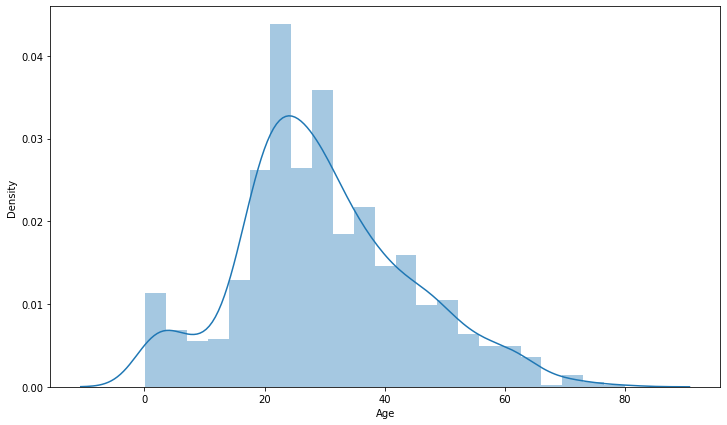

In [53]:
plt.figure(figsize=(12,7))
sns.distplot(df['Age'],kde=True  )
plt.show()

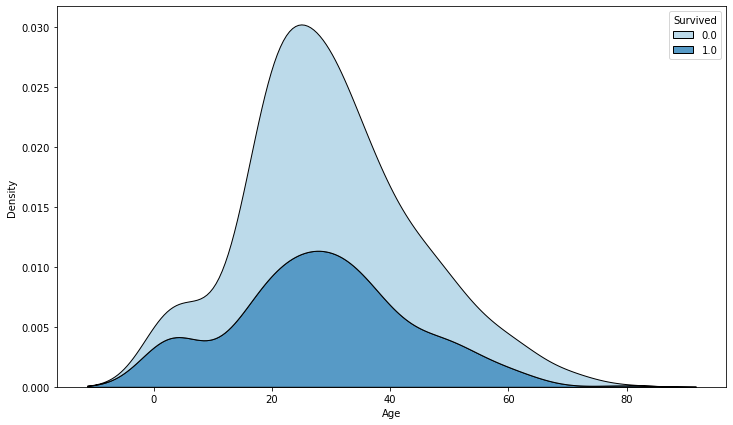

In [54]:
plt.figure(figsize=(12,7))
sns.kdeplot(data=df, x="Age", hue="Survived",palette="Paired", multiple="stack")
plt.show()


## Summaries for age :
#### - the destribution of survived  for range of age and not survived is almost the same  .
#### - most survived is Females and the high class ticket .
#### - young people age <= 10 survived .
#### - arge number of 15-25 year olds did not survive .
#### - most passengers are in 15-35 age range .




# Cabin vs Survivel

In [55]:
df.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
cabin=df["Cabin"].value_counts().reset_index()
cabin.columns=["Cabin","count"]
cabin

,Cabin,count
0,C23 C25 C27,6
1,G6,5
2,B57 B59 B63 B66,5
3,C22 C26,4
4,F33,4
...,...,...
181,A14,1
182,E63,1
183,E12,1
184,E38,1


# Embarked vs Survived

In [57]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = df[df["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = df[df["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = df[df["Embarked"] == "Q"].shape[0] 
print(queenstown)

Number of people embarking in Southampton (S):
914
Number of people embarking in Cherbourg (C):
270
Number of people embarking in Queenstown (Q):
123


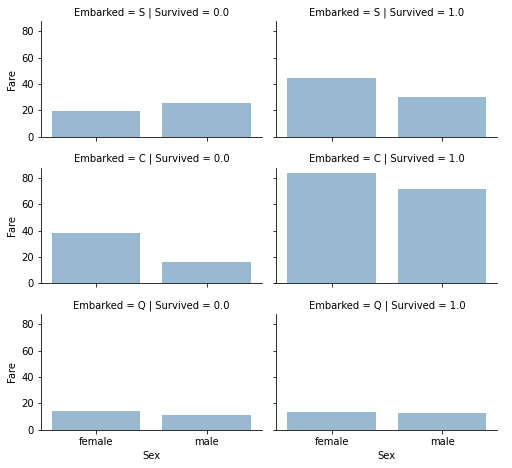

In [58]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

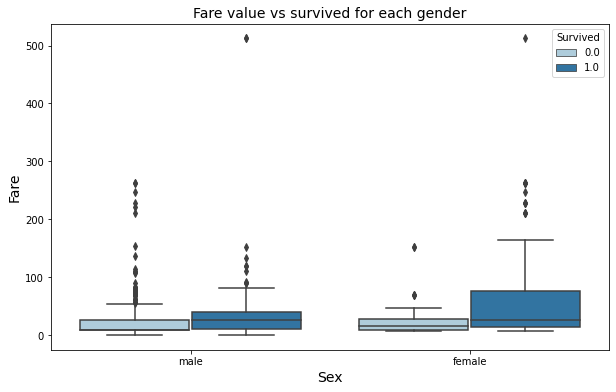

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Fare', data=df, x="Sex" , hue ="Survived" ,palette="Paired")
plt.title('Fare value vs survived for each gender', fontsize=14)
plt.xlabel('Sex', fontsize=14 )
plt.ylabel('Fare', fontsize=14)
plt.show()

# **Data preparation** :

### Feature engnerring

In [60]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [61]:
df.drop(["PassengerId","Name",'Ticket','Cabin'] , axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,NaN,3,male,NaN,0,0,8.0500,S
1305,NaN,1,female,39.0,0,0,108.9000,C
1306,NaN,3,male,38.5,0,0,7.2500,S
1307,NaN,3,male,NaN,0,0,8.0500,S


In [62]:
df.dropna(subset=['Survived'],inplace = True)

In [63]:
for i in df:
    df['Title'] = df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

In [64]:
for i in df:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [65]:
for i in df:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [66]:
for i in df:
    df['IsAlone'] = 0
    df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [67]:
## Split all Dataset to Feature & Target
X = df.drop(columns=['Survived' ,'Name','Ticket','Cabin'], axis=1)   ## Features
y = df['Survived']   ## target

### Splting data to train and test :

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=1, stratify=None)

In [69]:
## Separete the columns according to type (numerical or categorical)
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['float32', 'float64', 'int32', 'int64']]
categ_cols = [col for col in X_train.columns if X_train[col].dtype not in ['float32', 'float64', 'int32', 'int64']]

In [70]:
print('Numerical Columns : \n', num_cols)
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']
Categorical Columns : 
 ['Sex', 'Embarked', 'Title']


In [71]:
standardizer = StandardScaler()

In [72]:
imputer = SimpleImputer()

In [73]:
Label_encoder = LabelEncoder()

In [74]:

## numerical pipeline
num_pipeline = Pipeline([
                        ('selector', DataFrameSelector(num_cols)),    
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                        ])

## categorical pipeline
categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(categ_cols)),    
            ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse=False))])




In [75]:
total_pipeline = FeatureUnion(transformer_list=[
                                            ('num_pipeline', num_pipeline),
                                            ('categ_pipeline', categ_pipeline)
                                               ]
                             )
## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = total_pipeline.fit_transform(X_train)
X_test_final = total_pipeline.transform(X_test)     

In [76]:
#

In [77]:
# #with numerical data will use meadian imputation Using SimpleImputer
# imputer = SimpleImputer(strategy='median')   ## Intialization
# imputer.fit(X_train[num_cols])   ## learn 

# Imputing Missing Categorical  Data  :
### An alternative solution is to fill in missing values with the feature’s most frequent value instead of  (KNN) classifier 

In [78]:
# #with caltegorical data will use  most freuqnt imputation stratigy  Using SimpleImputer
# imputer = SimpleImputer(strategy='most_frequent')   ## Intialization
# imputer.fit(X_train[categ_cols])   ## learn 
# ## Transform
# X_train_filled = imputer.transform(X_train[categ_cols])
# X_test_filled = imputer.transform(X_test[categ_cols])

# Standardize the feature :

In [79]:
# ## StandardScaler for each Feature to be (mean=0, std=1)
# ## This techniques helps for better training and to converge faster and put all features in the same scale
# scaler = StandardScaler()  

# ## Learn and Transform in one step for train set , and transform only for test set
# X_train_scaled = scaler.fit_transform(X_train_filled)  
# X_test_scaled = scaler.transform(X_test_filled)  

In [80]:

X_train.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'FamilySize', 'IsAlone'],
      dtype='object')

In [81]:
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_train_final, y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

In [82]:
print('Optimal number of features :', rfecv.n_features_)


Optimal number of features : 8


In [83]:
print('Best features :',[rfecv.support_])

Best features : [array([ True,  True,  True, False, False,  True,  True, False,  True,
        True, False, False, False, False, False,  True, False, False])]


In [84]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', rfecv.support_)

Optimal number of features : 8
Best features : [ True  True  True False False  True  True False  True  True False False
 False False False  True False False]


In [85]:
rfecv.estimator_.feature_importances_

array([0.18976483, 0.08404368, 0.15757951, 0.1803819 , 0.07260882,
       0.10205649, 0.09936862, 0.11419614])

# Modeling : 

## Logistic regression

In [86]:
logit = LogisticRegression()


In [87]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [88]:
scoring = [ 'f1_score' ,'accuracy']

In [89]:
logit = LogisticRegression()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scoring = [ 'f1' ,'accuracy']

Cross_Val_Score = cross_validate(estimator=logit, X=X_train_final, y=y_train, 
                               cv=skf, scoring=scoring, n_jobs=-1)  

In [90]:
Cross_Val_Score

{'fit_time': array([0.0175066 , 0.0109911 , 0.01431155, 0.01163816, 0.02608347]),
 'score_time': array([0.00233603, 0.00160885, 0.001899  , 0.0017972 , 0.00216222]),
 'test_f1': array([0.74782609, 0.75      , 0.78181818, 0.73873874, 0.83050847]),
 'test_accuracy': array([0.80921053, 0.81578947, 0.8410596 , 0.80794702, 0.86754967])}

In [91]:
print( "F1_score : " ,Cross_Val_Score['test_f1'].mean())
print( "accuracy : " ,Cross_Val_Score['test_accuracy'].max())

F1_score :  0.7697782964179427
accuracy :  0.8675496688741722


In [92]:
y_pred = cross_val_predict(estimator = logit ,X=X_train_final, y=y_train , cv=skf,n_jobs=-1)
conf_mat = confusion_matrix(y_train, y_pred )
conf_mat

array([[409,  60],
       [ 70, 218]])

<AxesSubplot:>

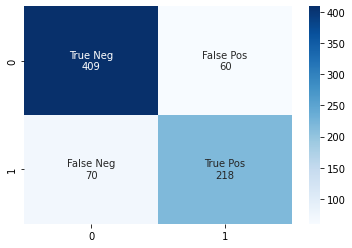

In [93]:
TF = ['True Neg','False Pos','False Neg','True Pos']
counts = [f'{value:0.0f}'.format(value) for value in conf_mat.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(TF,counts)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat ,annot=labels, fmt='',cbar=True ,cmap='Blues')

In [94]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [95]:
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(logit, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_final,y_train)
clf_performance(best_clf_lr,'Logistic Regression')


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8322847682119205
Best Parameters: {'C': 0.615848211066026, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


## Perceptron : 


In [96]:

perceptron = Perceptron()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scoring = [ 'f1' ,'accuracy']

Cross_Val_Score = cross_validate(estimator=perceptron, X=X_train_final, y=y_train, 
                               cv=skf, scoring=scoring, n_jobs=-1) 


In [97]:
Cross_Val_Score

{'fit_time': array([0.00268364, 0.00174379, 0.00196004, 0.00220323, 0.00185657]),
 'score_time': array([0.00134802, 0.0015018 , 0.00218558, 0.00212264, 0.00144935]),
 'test_f1': array([0.73076923, 0.67857143, 0.7       , 0.59887006, 0.64516129]),
 'test_accuracy': array([0.81578947, 0.76315789, 0.8013245 , 0.52980132, 0.78145695])}

In [98]:
print( "F1_score : " ,Cross_Val_Score['test_f1'].mean())
print( "accuracy : " ,Cross_Val_Score['test_accuracy'].max())

F1_score :  0.670674401232083
accuracy :  0.8157894736842105


In [99]:
perceptron = Perceptron()

In [100]:
param_grid = {'max_iter' : [2000],
              'random_state':(1,42,1),
              'penalty' : ['l1', 'l2']
              }

clf_perceptron = GridSearchCV(perceptron, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_perceptron = clf_perceptron.fit(X_train_final,y_train)
clf_performance(best_clf_perceptron,'perceptron')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
perceptron
Best Score: 0.788767863367027
Best Parameters: {'max_iter': 2000, 'penalty': 'l1', 'random_state': 42}


In [101]:
y_pred = cross_val_predict(estimator = perceptron ,X=X_train_final, y=y_train , cv=skf,n_jobs=-1)
conf_mat = confusion_matrix(y_train, y_pred )
conf_mat

array([[365, 104],
       [ 94, 194]])

<AxesSubplot:>

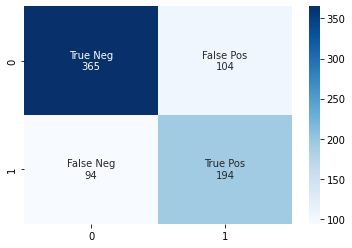

In [102]:
TF = ['True Neg','False Pos','False Neg','True Pos']
counts = [f'{value:0.0f}'.format(value) for value in conf_mat.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(TF,counts)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat ,annot=labels, fmt='',cbar=True ,cmap='Blues')

## K-nearest neighbors

In [103]:
knn = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scoring = [ 'f1' ,'accuracy']

Cross_Val_Score = cross_validate(estimator=knn , X=X_train_final, y=y_train, 
                               cv=skf, scoring=scoring, n_jobs=-1) 

In [104]:
Cross_Val_Score

{'fit_time': array([0.00117397, 0.00118661, 0.00102115, 0.00115299, 0.00099397]),
 'score_time': array([0.01269484, 0.01087809, 0.01058412, 0.01051784, 0.00959229]),
 'test_f1': array([0.75438596, 0.75      , 0.72380952, 0.69230769, 0.80357143]),
 'test_accuracy': array([0.81578947, 0.81578947, 0.80794702, 0.78807947, 0.85430464])}

In [105]:
print( "F1_score : " ,Cross_Val_Score['test_f1'].mean())
print( "accuracy : " ,Cross_Val_Score['test_accuracy'].max())

F1_score :  0.7448149219201851
accuracy :  0.8543046357615894


In [106]:
param_grid = {
              'n_neighbors': (1,10, 1),
              'leaf_size': (20,40,1),
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'metric': ('minkowski', 'chebyshev'),
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 7, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_final,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 7 folds for each of 216 candidates, totalling 1512 fits
KNN
Best Score: 0.8256880733944953
Best Parameters: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


### ****Decision Tree Classifier****

In [107]:
dt = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scoring = [ 'f1' ,'accuracy']

Cross_Val_Score = cross_validate(estimator=knn , X=X_train_final, y=y_train, 
                               cv=skf, scoring=scoring, n_jobs=-1) 

In [108]:
Cross_Val_Score

{'fit_time': array([0.00096083, 0.00130796, 0.00093508, 0.0011642 , 0.0010314 ]),
 'score_time': array([0.00662327, 0.01029015, 0.00782514, 0.00640059, 0.00641537]),
 'test_f1': array([0.75438596, 0.75      , 0.72380952, 0.69230769, 0.80357143]),
 'test_accuracy': array([0.81578947, 0.81578947, 0.80794702, 0.78807947, 0.85430464])}

In [109]:
print( "F1_score : " ,Cross_Val_Score['test_f1'].mean())
print( "accuracy : " ,Cross_Val_Score['test_accuracy'].max())

F1_score :  0.7448149219201851
accuracy :  0.8543046357615894


## **Randon forest classifier**

In [110]:
rf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scoring = [ 'f1' ,'accuracy']

Cross_Val_Score = cross_validate(estimator=knn , X=X_train_final, y=y_train, 
                               cv=skf, scoring=scoring, n_jobs=-1)

In [111]:
Cross_Val_Score

{'fit_time': array([0.00095654, 0.00098467, 0.00117254, 0.00112891, 0.00085568]),
 'score_time': array([0.00953722, 0.00899744, 0.01014471, 0.00693774, 0.00604963]),
 'test_f1': array([0.75438596, 0.75      , 0.72380952, 0.69230769, 0.80357143]),
 'test_accuracy': array([0.81578947, 0.81578947, 0.80794702, 0.78807947, 0.85430464])}

In [112]:
print( "F1_score : " ,Cross_Val_Score['test_f1'].mean())
print( "accuracy : " ,Cross_Val_Score['test_accuracy'].max())

F1_score :  0.7448149219201851
accuracy :  0.8543046357615894


In [113]:
rf = RandomForestClassifier()
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_final,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest
Best Score: 0.8428807947019867
Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [114]:
print( "F1_score : " ,Cross_Val_Score['test_f1'].mean())
print( "accuracy : " ,Cross_Val_Score['test_accuracy'].max())

F1_score :  0.7448149219201851
accuracy :  0.8543046357615894


## **SVC**

In [115]:
svc = SVC()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scoring = [ 'f1' ,'accuracy']

Cross_Val_Score = cross_validate(estimator=svc , X=X_train_final, y=y_train, 
                               cv=skf, scoring=scoring, n_jobs=-1)

In [116]:
Cross_Val_Score

{'fit_time': array([0.01021433, 0.01514125, 0.01546192, 0.01509213, 0.01541066]),
 'score_time': array([0.00567603, 0.00530267, 0.00558639, 0.0055182 , 0.00417209]),
 'test_f1': array([0.78571429, 0.74545455, 0.75      , 0.74074074, 0.8245614 ]),
 'test_accuracy': array([0.84210526, 0.81578947, 0.82781457, 0.81456954, 0.86754967])}

In [117]:
print( "F1_score : " ,Cross_Val_Score['test_f1'].mean())
print( "accuracy : " ,Cross_Val_Score['test_accuracy'].max())

F1_score :  0.7692941950836688
accuracy :  0.8675496688741722


In [118]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000,2000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5,6], 'C': [.1, 1, 10, 100, 1000,2000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_final,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 66 candidates, totalling 330 fits
SVC
Best Score: 0.8349512025095851
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [119]:
xgb = XGBClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scoring = [ 'f1' ,'accuracy']

Cross_Val_Score = cross_validate(estimator=xgb , X=X_train_final, y=y_train, 
                               cv=skf, scoring=scoring, n_jobs=-1)

In [120]:
Cross_Val_Score

{'fit_time': array([0.44196796, 0.38796329, 0.3721683 , 0.38612485, 0.26790476]),
 'score_time': array([0.00581074, 0.00554442, 0.00568795, 0.0056622 , 0.00429225]),
 'test_f1': array([0.75      , 0.73394495, 0.73214286, 0.71559633, 0.80733945]),
 'test_accuracy': array([0.81578947, 0.80921053, 0.8013245 , 0.79470199, 0.86092715])}

In [121]:
print( "F1_score : " ,Cross_Val_Score['test_f1'].mean())
print( "accuracy : " ,Cross_Val_Score['test_accuracy'].max())

F1_score :  0.7478047182175623
accuracy :  0.8609271523178808


In [122]:
param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}


clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_final,y_train)
clf_performance(best_clf_xgb_rnd,'XGB')


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
XGB
Best Score: 0.8481352387591496
Best Parameters: {'subsample': 0.7, 'sampling_method': 'uniform', 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 20, 'min_child_weight': 0.01, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.5}


In [123]:
best_xgb_params = best_clf_xgb_rnd.best_params_
print('best_xgb_params : ', best_xgb_params)

## Get the best estimator
best_xgb = best_clf_xgb_rnd.best_estimator_  
print('best_xgb : ', best_xgb)

best_xgb_params :  {'subsample': 0.7, 'sampling_method': 'uniform', 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 20, 'min_child_weight': 0.01, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.5}
best_xgb :  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0,
              min_child_weight=0.01, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0.5, reg_lambda=1, ...)


## **Voting Classifier **

In [124]:
votting_cls = VotingClassifier(estimators=[
...         ('logit', logit), ('knn',knn), ('xgb', xgb)],
...         voting='hard',
            weights=(0.2,0.3,0.5))

In [125]:
votting_cls.fit(X_train_final, y_train)

VotingClassifier(estimators=[('logit', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin

In [126]:
print('VotingClassifierModel Train Score is : ' , votting_cls.score(X_train_final, y_train))
print('VotingClassifierModel Test Score is : ' , votting_cls.score(X_test_final, y_test))


VotingClassifierModel Train Score is :  0.9379128137384413
VotingClassifierModel Test Score is :  0.7761194029850746


In [127]:
y_pred = votting_cls.predict(X_test_final)
print('Predicted Value for Voting Classifier Model is : ' , y_pred)

Predicted Value for Voting Classifier Model is :  [1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]


In [128]:
conf_mat = confusion_matrix(y_test, y_pred )
conf_mat

array([[73,  7],
       [23, 31]])

<AxesSubplot:>

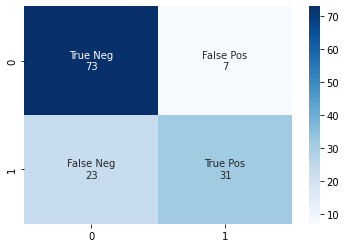

In [129]:
TF = ['True Neg','False Pos','False Neg','True Pos']
counts = [f'{value:0.0f}'.format(value) for value in conf_mat.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(TF,counts)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat ,annot=labels, fmt='',cbar=True ,cmap='Blues')

In [130]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scoring = [ 'f1' ,'accuracy']

vote_Cross_Val_Score = cross_validate(estimator=votting_cls , X=X_train_final, y=y_train, 
                               cv=skf, scoring=scoring, n_jobs=-1)

In [131]:
Cross_Val_Score

{'fit_time': array([0.44196796, 0.38796329, 0.3721683 , 0.38612485, 0.26790476]),
 'score_time': array([0.00581074, 0.00554442, 0.00568795, 0.0056622 , 0.00429225]),
 'test_f1': array([0.75      , 0.73394495, 0.73214286, 0.71559633, 0.80733945]),
 'test_accuracy': array([0.81578947, 0.80921053, 0.8013245 , 0.79470199, 0.86092715])}

In [132]:
print( "F1_score : " ,vote_Cross_Val_Score['test_f1'].mean())
print( "accuracy : " ,vote_Cross_Val_Score['test_accuracy'].max())

F1_score :  0.7467370116996034
accuracy :  0.8741721854304636


In [133]:
y_pred_voting = cross_val_predict(estimator=votting_cls, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)

<AxesSubplot:>

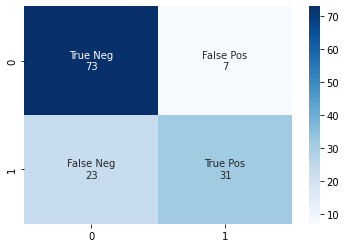

In [134]:
conf_mat = confusion_matrix(y_test, y_pred )
conf_mat
TF = ['True Neg','False Pos','False Neg','True Pos']
counts = [f'{value:0.0f}'.format(value) for value in conf_mat.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(TF,counts)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat ,annot=labels, fmt='',cbar=True ,cmap='Blues')

In [135]:
joblib.dump(xgb, 'best_xgb.pkl')

['best_xgb.pkl']

In [136]:
loaded_model = joblib.load('best_xgb.pkl')
loaded_model


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)